In [5]:
from library.optimiser import *
from library.objective_function import *
from library.post_analysis import *
from library.experiments import *
import time
%matplotlib inline
SEED = 23191

In [135]:
def test_high_dimension_same_side(opt, num=1, length=10, hasSTD=False):
    max_dim = np.arange(10, 210, 10).shape[0]
    stats = {}
    dims = np.arange(10, 210, 10)
    times = np.zeros((max_dim, ))
    costs = np.zeros((max_dim, ))
    evals = np.zeros((max_dim, ))

    for i, dim in enumerate(np.arange(10, 210, 10)):
        points_ = np.random.rand(dim, num) * length
        cost = np.zeros((num, ))
        eval_ = np.zeros((num, ))
        start = time.time()
        for j in range(num):
            opt.dim = dim
            if hasSTD:
                opt.std = torch.ones((dim,), dtype=torch.float32) * 3
            opt.x0 = torch.tensor(points_[:,j], dtype=torch.float32)
            _ , cost[j], stats = opt.optimise(ackley(dim=dim))
            eval_[j] = stats['evals']
        end = time.time()
        s = end - start
        times[i] = s / num
        costs[i] = cost.mean()
        evals[i] = eval_.mean()
        print("dim: {}, time: {}, cost: {}, evals: {}, time per eval: {} ".format(dim, times[i], costs[i], evals[i], times[i]/evals[i]))
    stats['time'] = times
    stats['evals'] = evals
    stats['cost'] = costs
    stats['dims'] = dims
    return stats

In [136]:
class post_analysis_highD:
    def __init__(self, stats):
        self.stats = stats
    def __plot(self, data, ylabel):
        fig = plt.figure(figsize=(10,6))
        ax = plt.subplot(111)
        ax.plot(self.stats['dims'], data)
        ax.set_xlabel("dimention")
        ax.set_ylabel(ylabel)
        return ax
        
    def plot_time_vs_dim(self):
        return self.__plot(self.stats['time'], "time(s)")
        
    def plot_evals_vs_dim(self):
        return self.__plot(self.stats['evals'], "evals")
        
    def plot_cost_vs_dim(self):
        return self.__plot(self.stats['cost'], "cost")
        

## round off (total local minimizer)

In [16]:
ro = round_off()
stats_ro = test_high_dimension_same_side(ro, 10)
ana_ro = post_analysis_highD(stats_ro)

dim: 10, time: 0.00030200481414794923, cost: 14.972833752351667, evals: 1.0, time per eval: 0.00030200481414794923 
dim: 20, time: 0.0003502130508422852, cost: 15.230108814146146, evals: 1.0, time per eval: 0.0003502130508422852 
dim: 30, time: 0.00022428035736083985, cost: 15.381693030902934, evals: 1.0, time per eval: 0.00022428035736083985 
dim: 40, time: 0.00024220943450927734, cost: 15.47144737781671, evals: 1.0, time per eval: 0.00024220943450927734 
dim: 50, time: 0.0003015041351318359, cost: 15.222679343695768, evals: 1.0, time per eval: 0.0003015041351318359 
dim: 60, time: 0.00019290447235107422, cost: 15.374548597773465, evals: 1.0, time per eval: 0.00019290447235107422 
dim: 70, time: 0.00014569759368896485, cost: 15.152982251352075, evals: 1.0, time per eval: 0.00014569759368896485 
dim: 80, time: 0.00012259483337402345, cost: 15.32513856289797, evals: 1.0, time per eval: 0.00012259483337402345 
dim: 90, time: 0.00019969940185546876, cost: 15.645071509601573, evals: 1.0, t

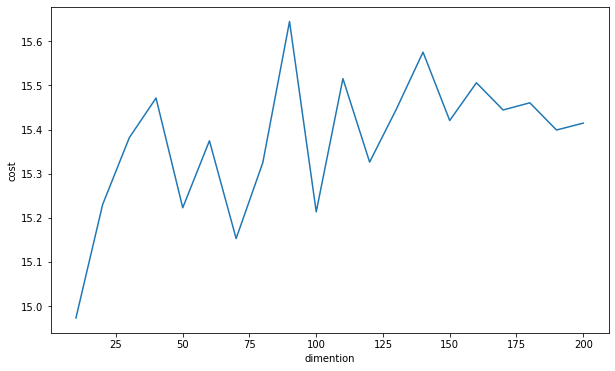

In [17]:
ana_ro.plot_cost_vs_dim()

## keep same distance to origin

## Adam

In [30]:
opt = adam()
optParas = {
         'x0': None,
         'alpha': 0.1,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 2000,
         'tol': 1e-6,              
         'verbose': False,
         'record': False }
opt.set_parameters(optParas)
stats_adam = test_high_dimension_same_side(opt, 10)
ana_adam = post_analysis_highD(stats_adam)

dim: 10, time: 0.052486085891723634, cost: 13.388499657137823, evals: 239.8, time per eval: 0.0002188744198987641 
dim: 20, time: 0.06241707801818848, cost: 13.674526939372532, evals: 246.0, time per eval: 0.0002537279594235304 
dim: 30, time: 0.056583595275878903, cost: 13.982345304038137, evals: 251.9, time per eval: 0.0002246272142750254 
dim: 40, time: 0.060780787467956544, cost: 13.544456651129048, evals: 254.7, time per eval: 0.0002386367784372067 
dim: 50, time: 0.05628540515899658, cost: 13.770690503850247, evals: 256.6, time per eval: 0.00021935076055727427 
dim: 60, time: 0.05659818649291992, cost: 13.547614533630982, evals: 258.9, time per eval: 0.00021861022206612563 
dim: 70, time: 0.054573583602905276, cost: 13.706867293632374, evals: 260.4, time per eval: 0.00020957597389748573 
dim: 80, time: 0.056490397453308104, cost: 13.675316855444075, evals: 262.5, time per eval: 0.0002152015141078404 
dim: 90, time: 0.055519700050354004, cost: 13.650381744654434, evals: 262.9, tim

In [29]:
class adam(adjust_optimizer):
    def __init__(self, alpha=0.01, verbose=False, dim=2):
        self.alpha = 0.01
        self.beta_1 = 0.9
        self.beta_2 = 0.999
        self.epsilon = 1e-11
        self.max_iter = 10000
        self.tol = 1e-3
        self.verbose = verbose
        self.record = False
        self.x0 = np.zeros((dim,))
        
    def set_parameters(self, paras):
        self.paras = paras
        self.x0 = paras['x0']
        self.alpha = paras['alpha']
        self.beta_1 = paras['beta_1']
        self.beta_2 = paras['beta_2']
        self.epsilon = paras['epsilon']
        self.max_iter = paras['max_iter']
        self.tol = paras['tol']
        self.verbose = True if 'verbose' not in paras.keys() else paras['verbose']
        self.record = False if 'record' not in paras.keys() else paras['record']
        
    def optimise(self, obj):
        m_t = 0 
        v_t = 0 
        eval_cnt = 0
        x = self.x0.clone()#.reshape(-1,1)
        stats = {}
        stats['status'] = None
        stats['gradient_before_after'] = []
        stats['arg'] = []
        stats['val'] = []
        if self.record:
            stats['arg'].append(x.copy())
            stats['val'].append(obj.func(x))
            stats['gradient_before_after'].append([obj.dfunc(x), obj.dfunc(x)])
        if self.verbose:
            print("\n\n*******starting optimisation from intitial point: ", self.x0.ravel())
        while eval_cnt < self.max_iter:					#till it gets converged
            eval_cnt += 1
            g_t = obj.dfunc(x)		#computes the gradient of the stochastic function
            m_t = self.beta_1*m_t + (1-self.beta_1)*g_t	#updates the moving averages of the gradient
            v_t = self.beta_2*v_t + (1-self.beta_2)*(g_t*g_t)	#updates the moving averages of the squared gradient
            m_cap = m_t/(1-(self.beta_1**eval_cnt))		#calculates the bias-corrected estimates
            v_cap = v_t/(1-(self.beta_2**eval_cnt))		#calculates the bias-corrected estimates
            x_prev = x.clone()								
            est_df = (m_cap)/(np.sqrt(v_cap)+self.epsilon)
            x -= self.alpha * est_df 	#updates the parameters
            if self.record:
                stats['arg'].append(x.copy())
                stats['val'].append(obj.func(x))
                stats['gradient_before_after'].append([g_t, est_df])
            if(np.linalg.norm(x-x_prev) < self.tol):		#checks if it is converged or not
                break
        if self.verbose:
            print('total evaluatios = {}'.format(eval_cnt))
            print('gradient at stop position = {},\nmodified graident = {}'.format(g_t, est_df))
            print('found minimum position = {}, found minimum = {}'.format(x, obj.func(x)))
        stats['arg'] = np.array(stats['arg'])
        stats['val'] = np.array(stats['val'])
        stats['gradient_before_after'] = np.array(stats['gradient_before_after'])
        stats['evals'] = eval_cnt
        return x, obj.func(x), stats

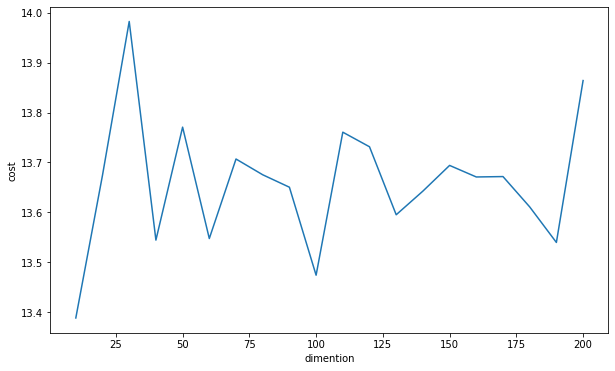

In [31]:
ana_adam.plot_cost_vs_dim()

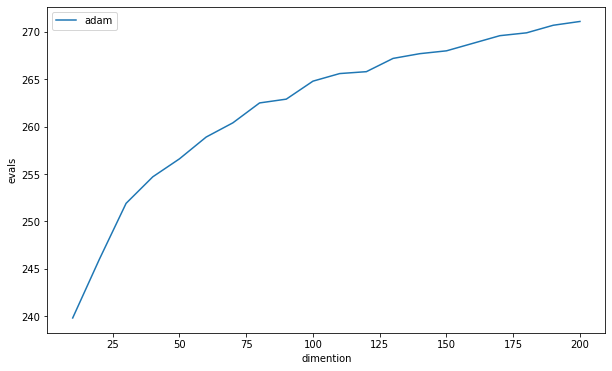

In [32]:
ana_adam.plot_evals_vs_dim()
plt.legend(["adam"])

## line search

In [35]:
paras = {
'x0':1,
'alpha':0.1,
'beta':0.01,
'max_iter':1000,
'tol':1e-1,
'verbose':False,
'record':False
}
ls = line_search()
ls.set_parameters(paras)
stats_ls = test_high_dimension_same_side(ls, 10)
ana_ls = post_analysis_highD(stats_ls)

dim: 10, time: 0.003233790397644043, cost: 13.286406495054944, evals: 17.6, time per eval: 0.0001837380907752297 
dim: 20, time: 0.007073807716369629, cost: 14.0617888429082, evals: 34.0, time per eval: 0.0002080531681285185 
dim: 30, time: 0.007962298393249512, cost: 13.776871905061318, evals: 47.6, time per eval: 0.00016727517632877126 
dim: 40, time: 0.011025500297546387, cost: 13.675542430568157, evals: 64.6, time per eval: 0.00017067337921898435 
dim: 50, time: 0.013096094131469727, cost: 13.80328135030985, evals: 88.2, time per eval: 0.0001484817928738064 
dim: 60, time: 0.014446282386779785, cost: 13.633022905604303, evals: 90.0, time per eval: 0.0001605142487419976 
dim: 70, time: 0.01902439594268799, cost: 13.523547662861542, evals: 108.6, time per eval: 0.00017517859984058924 
dim: 80, time: 0.020663905143737792, cost: 13.662540567420994, evals: 121.4, time per eval: 0.00017021338668647275 
dim: 90, time: 0.02223641872406006, cost: 13.620465703846966, evals: 138.4, time per e

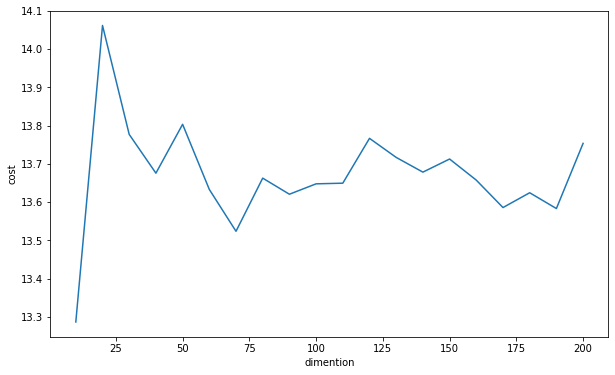

In [36]:
ana_ls.plot_cost_vs_dim()

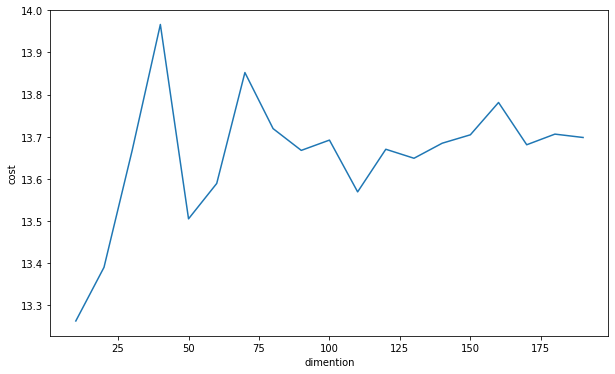

In [29]:
ana_ls.plot_cost_vs_dim()

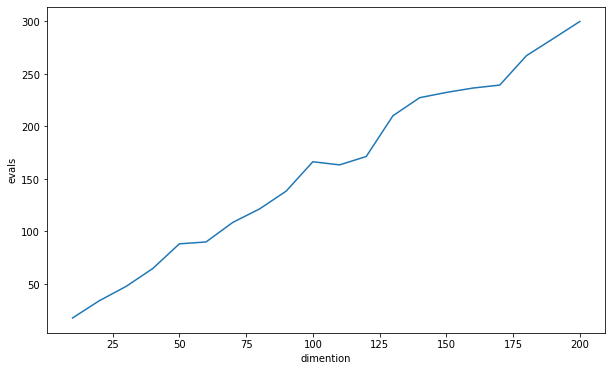

In [37]:
ana_ls.plot_evals_vs_dim()

## cma

In [144]:
class cma_es(adjust_optimizer):
    def __init__(self, dim=2):
        self.dim = dim
        paras = {'x0': torch.zeros((dim,)),
                 'std': torch.ones((dim,)) * 3, 
                 'tol': 1e-5, 
                 'adjust_func': do_nothing(), 
                 'record': False, 
                 'verbose': False}
        self.set_parameters(paras)
    def set_parameters(self, paras):
        self.paras = paras
        self.x0 = paras['x0'] 
        self.std = paras['std']
        self.tol = paras['tol']
        self.adjust_func = paras['adjust_func']
        self.max_iter = 400 if 'max_iter' not in paras.keys() else paras['max_iter']
        # set none to use default value 
        self.cluster_size = None if 'cluster_size' not in paras.keys() else paras['cluster_size']
        self.survival_size = None if 'survival_size' not in paras.keys() else paras['survival_size']
        self.record = True if 'record' not in paras.keys() else paras['record']
        self.verbose = True if 'verbose' not in paras.keys() else paras['verbose']
    def optimise(self, obj):
        '''
        @param obj: objective function class instance
        return arg: found minimum arguments
               val: found minimum value
               stats: collection of recorded statistics for post-analysis
        '''                  
        def update_mean(x):
            return (weights @ x).reshape(dim, 1)
        def update_ps(ps, sigma, C, mean, mean_old):
            return (1 - cs) * ps + torch.sqrt(cs * (2 - cs) * mueff) * invsqrtC @ (mean - mean_old) / sigma 
        def update_pc(pc, sigma, ps, mean, mean_old):
            hsig = (torch.norm(ps) / torch.sqrt(1 - (1 - cs)**(2 * iter_/lambda_)) / chiN < 1.4 + 2/(dim + 1)).int()
            return (1 - cc) * pc + hsig * torch.sqrt(cc * (2 - cc) * mueff) * (mean - mean_old) / sigma
        def update_C(C, pc, x, mean_old, sigma):
            hsig = (torch.norm(ps) / torch.sqrt(1 - (1 - cs)**(2 * iter_/lambda_)) / chiN < (1.4 + 2/(dim + 1))).int()
            artmp = (1 / sigma) * (x - mean_old.reshape(1, dim))
            return (1 - c1 - cmu) * C + c1 * (pc * pc.T + (1 - hsig) * cc * (2 - cc) * C) + cmu * artmp.T @ torch.diag(weights) @ artmp
        def update_sigma(sigma, ps):
            return sigma * torch.exp((cs / damps) * (torch.norm(ps)/ chiN - 1))
        def is_not_moving(arg, val, pre_arg, pre_val, tol):
            dis_arg = torch.norm(arg - pre_arg, dim=1).mean()
            dis_val = torch.abs(val - pre_val).mean()
            return (dis_arg < tol and dis_val < tol) 

        if self.verbose:
            print("\n\n*******starting optimisation from intitial mean: ", self.x0.squeeze())
        # User defined input parameters 
        dim = self.dim
        sigma = 0.3
        D = self.std / sigma
        mean = self.x0.reshape(dim, 1)
        # the size of solutions group
        lambda_ = 4 + int(3 * np.log(dim)) if self.cluster_size == None else self.cluster_size  
        # only best "mu" solutions are used to generate iterations
        mu = int(lambda_ / 2) if self.survival_size == None else self.survival_size
        # used to combine best "mu" solutions                                               
        weights = np.log(mu + 1/2) - torch.log(torch.arange(mu, dtype=torch.float) + 1) 
        weights = (weights / torch.sum(weights)).float()    
        mueff = 1 / torch.sum(weights**2) 

        # Strategy parameter setting: Adaptation
        # time constant for cumulation for C
        cc = (4 + mueff / dim) / (dim + 4 + 2 * mueff / dim)  
        # t-const for cumulation for sigma control
        cs = (mueff + 2) / (dim + mueff + 5)  
        # learning rate for rank-one update of C
        c1 = 2 / ((dim + 1.3)**2 + mueff)    
        # and for rank-mu update
        cmu = min(1 - c1, 2 * (mueff - 2 + 1 / mueff) / ((dim + 2)**2 + mueff))  
        # damping for sigma, usually close to 1  
        damps = 1 + 2 * max(0, np.sqrt((mueff - 1)/( dim + 1)) - 1) + cs                                                                 

        # Initialize dynamic (internal) strategy parameters and constants
        # evolution paths for C and sigma
        pc = torch.zeros((dim, 1))     
        ps = torch.zeros((dim, 1)) 
        # B defines the coordinate system
        B = torch.eye(int(dim))       
        # covariance matrix C
        C = B * torch.diag(D**2) * B.T 
        # C^-1/2 
        invsqrtC = B * torch.diag(D**-1) * B.T   
        # expectation of ||N(0,I)|| == norm(randn(N,1)) 
        chiN = dim**0.5 * (1 - 1/(4 * dim) + 1 / (21 * dim**2))  

        # --------------------  Initialization --------------------------------  
        x, x_old, f = torch.zeros((lambda_, dim)), torch.zeros((lambda_, dim)), torch.zeros((lambda_,))
        stats = {}
        inner_stats = {}
        stats['inner'] = []
        stats['val'], stats['arg'] = [], []
        stats['x_adjust'] = []
        iter_eval, stats['evals_per_iter'] = torch.zeros((lambda_, )), []
        inner_stats = [{}] * lambda_
        stats['mean'], stats['std'] = [], []
        stats['status'] = None
        iter_, eval_ = 0, 0
        # initial data in record
        for i in range(lambda_):
            x[i,:] = (mean + torch.randn(dim, 1)).squeeze()
            f[i] = obj.func(x[i])
        idx = np.argsort(f)
        x_ascending = x[idx]
        if self.record:
            stats['inner'].append(inner_stats)
            stats['arg'].append(x_ascending)
            stats['val'].append(f[idx])
            stats['mean'].append(mean)
            stats['std'].append(sigma * B @ torch.diag(D))
            stats['evals_per_iter'].append(torch.ones((lambda_,)))
            stats['x_adjust'].append(np.vstack((x.T.copy(), x.T.copy())))
        arg = x_ascending
        val = f[idx]
        pre_arg = x_ascending
        pre_val = f[idx]
        best_val = 1e4
        best_arg = None
        
        # optimise by iterations
        try:
            while iter_ < self.max_iter:
                iter_ += 1
                # generate candidate solutions with some stochastic elements
                for i in range(lambda_):
                    x[i] = (mean + sigma * B @ torch.diag(D) @ torch.randn(dim, 1)).squeeze()
                    x_old[i] = x[i]
                    x[i], f[i], inner_stats[i] = self.adjust_func.adjust(x[i], obj)
                    eval_ += inner_stats[i]['evals']
                    iter_eval[i] = inner_stats[i]['evals']
                # sort the value and positions of solutions 
                idx = np.argsort(f)
                x_ascending = x[idx]

                # update the parameter for next iteration
                mean_old = mean
                mean = update_mean(x_ascending[:mu])
                ps =   update_ps(ps, sigma, C, mean, mean_old)
                pc =   update_pc(pc, sigma, ps, mean, mean_old)
                sigma = update_sigma(sigma, ps)
                C =    update_C(C, pc, x_ascending[:mu], mean_old, sigma)
                C = torch.triu(C) + torch.triu(C, 1).T
                D, B = torch.eig(C, eigenvectors=True)
                D = torch.sqrt(D[:,0])
                invsqrtC = B @ torch.diag(D**-1) @ B

                # record data during process for post analysis
                if self.record:
                    stats['inner'].append(inner_stats.copy())
                    stats['arg'].append(x_ascending)
                    stats['val'].append(f[idx])
                    stats['mean'].append(mean)
                    stats['std'].append(sigma * B @ np.diag(D))
                    stats['evals_per_iter'].append(iter_eval.copy())
                    stats['x_adjust'].append(np.vstack((x_old.T.copy(), x.T.copy())))
                # stopping condition    
                arg = x_ascending
                val = f[idx]
                if best_val > val[0]:
                    best_val = val[0]
                    best_arg = arg[0]              
                # check the stop condition
                if torch.max(D) > (torch.min(D) * 1e6):
                    stats['status'] = 'diverge'
                    print('diverge, concentrate in low dimension manifold')
                    break
                if is_not_moving(arg, val, pre_arg, pre_val, self.tol) :
                    break
                pre_arg = arg
                pre_val = val
        except np.linalg.LinAlgError as err:
            stats['status'] = 'diverge'
            print('diverge, raise LinAlgError!')
        finally:
            if self.verbose:
                print('eigenvalue of variance = {}'.format(D))
                print('total iterations = {}, total evaluatios = {}'.format(iter_, eval_))
                print('found minimum position = {}, found minimum = {}'.format(best_arg, best_val))

        # carry statistics info before quit
        if self.record:
            stats['arg'] = np.array(stats['arg'])
            stats['val'] = np.array(stats['val'])
            stats['mean'] = np.array(stats['mean'])
            stats['std'] = np.array(stats['std'])
            stats['evals_per_iter'] = np.array(stats['evals_per_iter'])
            stats['x_adjust'] = np.array(stats['x_adjust'])
        stats['evals'] = eval_
        return best_arg, best_val, stats

In [146]:
# 1 optimiser
opt = cma_es()
optParas ={'x0': torch.zeros((2,)),
           'std': torch.ones((2,)) * 3, 
           'tol': 1e-3, 
           'adjust_func': do_nothing(), 
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

stats_cma = test_high_dimension_same_side(opt, 1, hasSTD=True)
ana_cma = post_analysis_highD(stats_cma)

dim: 10, time: 0.5553431510925293, cost: 0.0007371902465820312, evals: 2350.0, time per eval: 0.00023631623450745927 
dim: 20, time: 1.2028679847717285, cost: 0.07791996002197266, evals: 4800.0, time per eval: 0.0002505974968274434 
dim: 30, time: 1.2418088912963867, cost: 1.5455312728881836, evals: 5600.0, time per eval: 0.00022175158773149762 
dim: 40, time: 1.3211538791656494, cost: 1.0531110763549805, evals: 6000.0, time per eval: 0.0002201923131942749 
dim: 50, time: 1.4501781463623047, cost: 2.5541887283325195, evals: 6000.0, time per eval: 0.0002416963577270508 
dim: 60, time: 2.185896873474121, cost: 2.5298662185668945, evals: 6400.0, time per eval: 0.00034154638648033143 
dim: 70, time: 2.078409194946289, cost: 4.445767402648926, evals: 6400.0, time per eval: 0.0003247514367103577 
dim: 80, time: 2.7026660442352295, cost: 4.522414207458496, evals: 6800.0, time per eval: 0.00039745088885812196 
dim: 90, time: 2.5176219940185547, cost: 6.593720436096191, evals: 6800.0, time per 

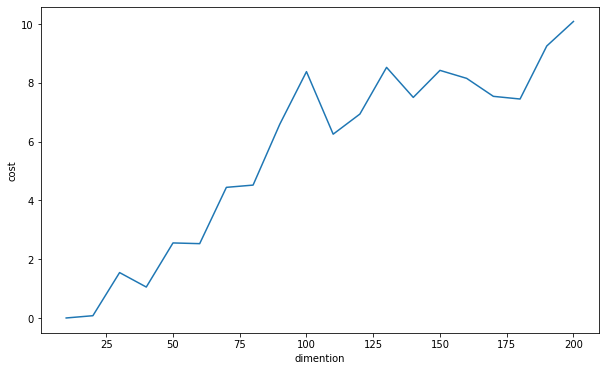

In [147]:
ana_cma.plot_cost_vs_dim()

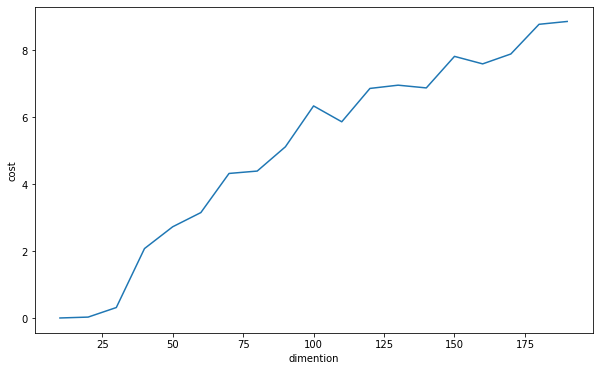

In [35]:
ana_cma.plot_cost_vs_dim()

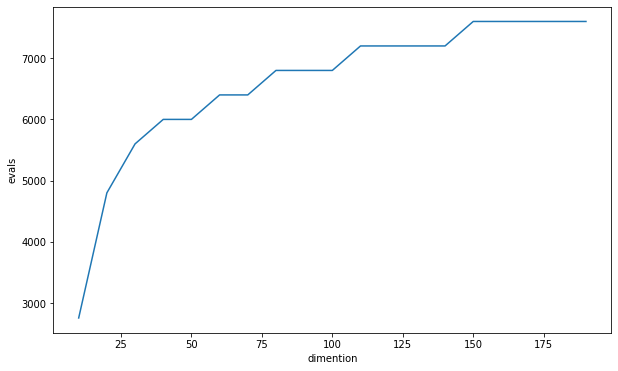

In [36]:
ana_cma.plot_evals_vs_dim()

In [88]:
# 1 optimiser
opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 3, 
           'tol': 1e-1, 
           'adjust_func': do_nothing(), 
           'max_iter': 1000,
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

stats_cma = test_high_dimension_same_side(opt, 1, hasSTD=True)
ana_cma = post_analysis_highD(stats_cma)

dim: 10, time: 0.10495805740356445, cost: 0.06335681640821678, evals: 1150.0, time per eval: 9.126787600309952e-05 


/Users/huajian/Non-convex/library/optimiser.py:150: ComplexWarning:

Casting complex values to real discards the imaginary part



dim: 20, time: 0.31101417541503906, cost: 0.06267447413323923, evals: 3624.0, time per eval: 8.58206885803088e-05 
dim: 30, time: 0.7343759536743164, cost: 0.050277420353808555, evals: 7056.0, time per eval: 0.00010407822472708566 
dim: 40, time: 1.4055569171905518, cost: 0.04731332481231165, evals: 12105.0, time per eval: 0.00011611374780591092 
dim: 50, time: 1.8164448738098145, cost: 0.046865954775978214, evals: 12630.0, time per eval: 0.00014381986332619276 
dim: 60, time: 2.658221960067749, cost: 0.13445204145916323, evals: 16000.0, time per eval: 0.0001661388725042343 
dim: 70, time: 3.512701988220215, cost: 0.31863234710904864, evals: 16000.0, time per eval: 0.00021954387426376343 
dim: 80, time: 4.561464071273804, cost: 2.8620906275737146, evals: 17000.0, time per eval: 0.0002683214159572826 
dim: 90, time: 5.709452152252197, cost: 2.1384658328604407, evals: 17000.0, time per eval: 0.0003358501266030704 
dim: 100, time: 6.8715736865997314, cost: 3.138737698255554, evals: 17000.

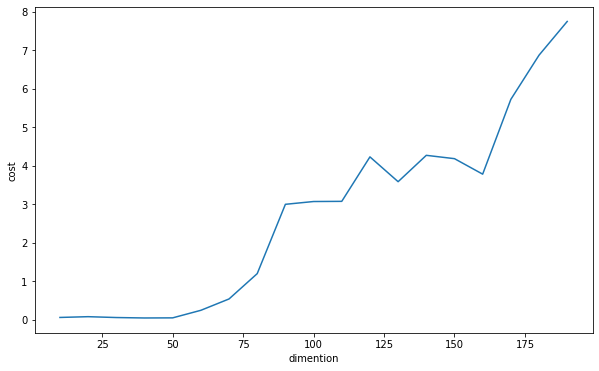

In [39]:
ana_cma.plot_cost_vs_dim()

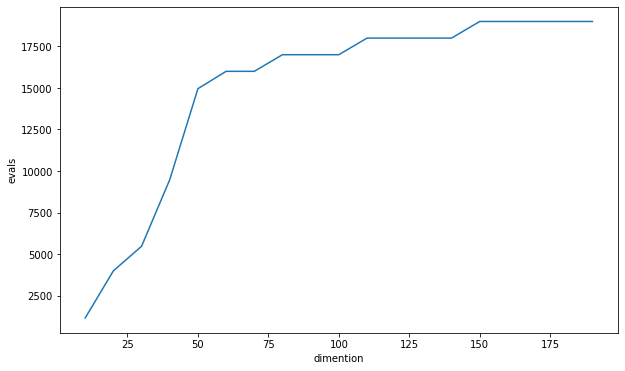

In [40]:
ana_cma.plot_evals_vs_dim()

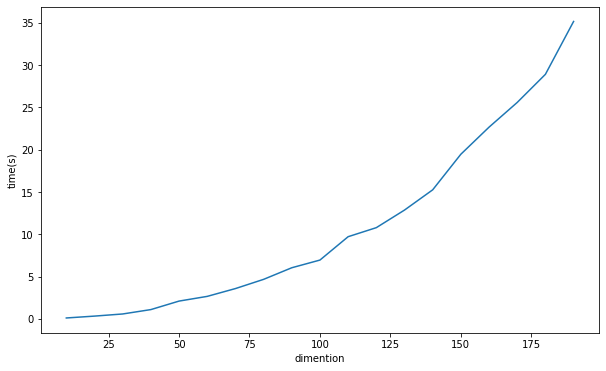

In [41]:
ana_cma.plot_time_vs_dim()

In [30]:
ana_ad = post_analysis_highD(stats_ad)

In [20]:
cma = cma_es()
stats_ad = test_high_dimension_cma(cma)

dim: 1, time: 0.03937792778015137, cost: 1.7296792624854618e-06, evals: 196.0
dim: 11, time: 0.31318020820617676, cost: 2.5791379965500738e-05, evals: 3839.0
dim: 21, time: 0.4485137462615967, cost: 0.0082663504355307, evals: 5200.0
dim: 31, time: 0.5610907077789307, cost: 0.29450176065664424, evals: 5600.0
dim: 41, time: 0.7663192749023438, cost: 2.027314080072085, evals: 6000.0
dim: 51, time: 0.9734439849853516, cost: 3.3053796735329866, evals: 6000.0
dim: 61, time: 1.1368680000305176, cost: 3.1667732428782007, evals: 6400.0
dim: 71, time: 1.464972972869873, cost: 4.5921453186339924, evals: 6400.0
dim: 81, time: 1.8459439277648926, cost: 5.3468395541218285, evals: 6800.0
dim: 91, time: 2.3009791374206543, cost: 6.344076803924189, evals: 6800.0
dim: 101, time: 2.8644068241119385, cost: 7.86297355947519, evals: 6800.0
dim: 111, time: 3.568682909011841, cost: 4.675826227566155, evals: 7200.0
dim: 121, time: 4.2510621547698975, cost: 8.016529886268792, evals: 7200.0
dim: 131, time: 5.622

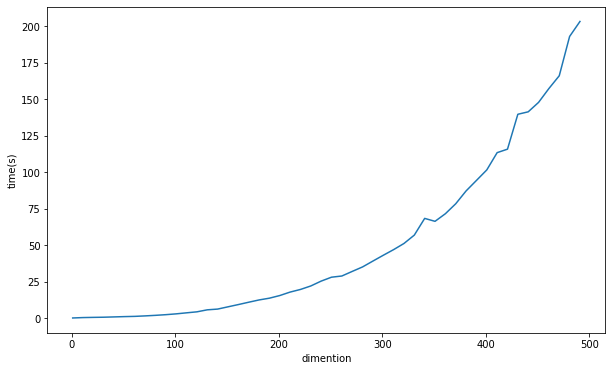

In [23]:
ana_ad.plot_time_vs_dim()

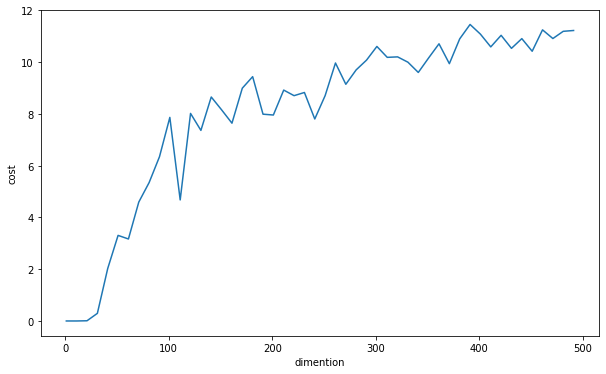

In [24]:
ana_ad.plot_cost_vs_dim()

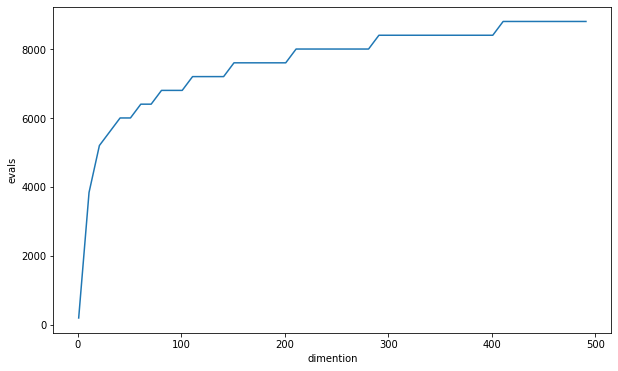

In [25]:
ana_ad.plot_evals_vs_dim()

## cma-es with line search

In [98]:
# 1 optimiser
inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 1,
    'beta': 0.1, 
    'max_iter': 10,
    'tol': 1e-1,              
    'verbose': False,
    'record': False
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 30, 
           'tol': 1e-1, 
           'adjust_func': inner_opt, 
           'max_iter': 1000,
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

stats_cmals = test_high_dimension_same_side(opt, 1, hasSTD=True)
ana_cmals = post_analysis_highD(stats_cmals)

dim: 10, time: 0.22884297370910645, cost: 4.347218894640292e-06, evals: 5618.0, time per eval: 4.073388638467541e-05 
dim: 20, time: 0.5019280910491943, cost: 6.389832041708843e-06, evals: 12618.0, time per eval: 3.977873601594503e-05 
dim: 30, time: 1.2287707328796387, cost: 2.1453971701834718e-05, evals: 28862.0, time per eval: 4.257399809020992e-05 
dim: 40, time: 1.6126279830932617, cost: 5.150045570889716e-06, evals: 38487.0, time per eval: 4.190058937026169e-05 
dim: 50, time: 1.8355779647827148, cost: 2.526192237173319e-06, evals: 41669.0, time per eval: 4.405140427614569e-05 
dim: 60, time: 3.7515017986297607, cost: 8.991795086288334e-08, evals: 80540.0, time per eval: 4.6579361790784217e-05 
dim: 70, time: 3.285691022872925, cost: 9.248864995203832e-06, evals: 64416.0, time per eval: 5.100737429944307e-05 
dim: 80, time: 6.638718843460083, cost: 5.056398528768824e-06, evals: 118790.0, time per eval: 5.5886175969863484e-05 
dim: 90, time: 6.5466930866241455, cost: 1.14356033664

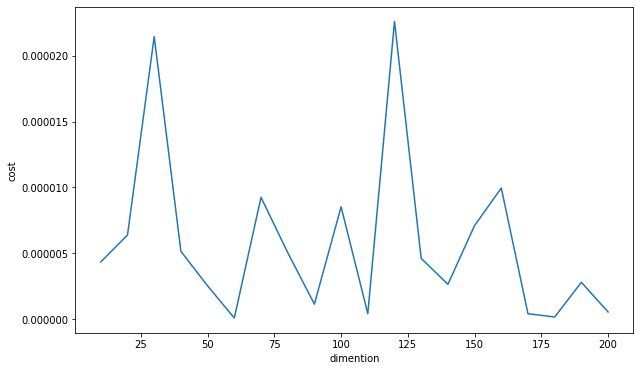

In [99]:
ana_cmals.plot_cost_vs_dim()

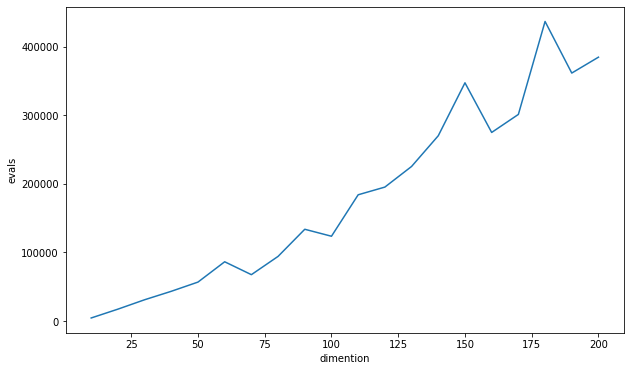

In [93]:
ana_cmals.plot_evals_vs_dim()

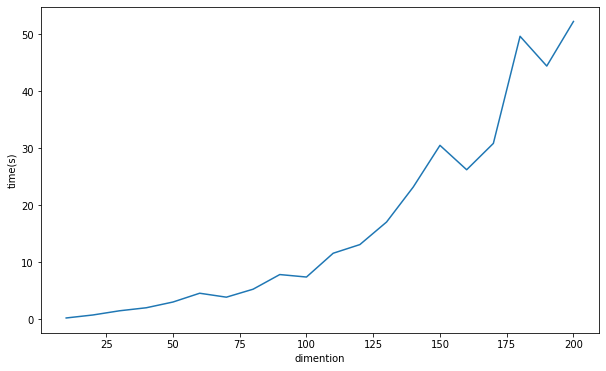

In [94]:
ana_cmals.plot_time_vs_dim()

In [103]:
# 1 optimiser
opt = adam()
optParas = {
         'x0': None,
         'alpha': 1,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 10,
         'tol': 1e-1,              
         'verbose': False,
         'record': False }
opt.set_parameters(optParas)

opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 3, 
           'tol': 1e-1, 
           'adjust_func': inner_opt, 
           'max_iter': 1000,
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

stats_cmadm = test_high_dimension_same_side(opt, 1, hasSTD=True)
ana_cmadm = post_analysis_highD(stats_cmadm)

dim: 10, time: 0.20572304725646973, cost: 2.0209183170027956e-05, evals: 4922.0, time per eval: 4.179663698831161e-05 
dim: 20, time: 0.5532059669494629, cost: 6.837983090868249e-07, evals: 13592.0, time per eval: 4.0700851011584966e-05 
dim: 30, time: 1.9285502433776855, cost: 1.1873002887075046e-05, evals: 40581.0, time per eval: 4.752347757269869e-05 
dim: 40, time: 2.0519752502441406, cost: 1.3408101229295255e-06, evals: 41170.0, time per eval: 4.984151688715425e-05 
dim: 50, time: 2.8868770599365234, cost: 7.814904627867492e-06, evals: 53901.0, time per eval: 5.3558877570667025e-05 
dim: 60, time: 3.134589195251465, cost: 3.715936220949345e-07, evals: 65435.0, time per eval: 4.7903861775066325e-05 
dim: 70, time: 5.029847860336304, cost: 1.9337309109523915e-06, evals: 85962.0, time per eval: 5.851245736879439e-05 
dim: 80, time: 6.320393323898315, cost: 1.93970190709436e-06, evals: 92163.0, time per eval: 6.85784243557427e-05 
dim: 90, time: 5.521755695343018, cost: 3.421040422058

In [107]:
stats_cmadam = stats_cmadm.stats

In [65]:
stats_cmadm = post_analysis_highD(stats_cmadm)

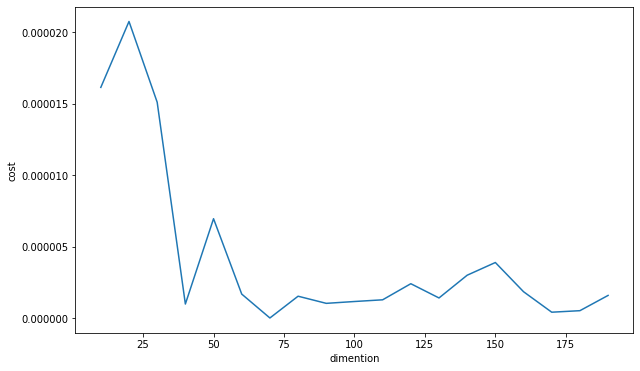

In [66]:
stats_cmadm.plot_cost_vs_dim()

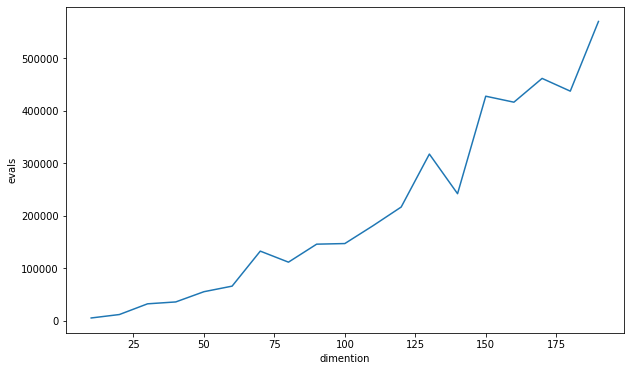

In [67]:
stats_cmadm.plot_evals_vs_dim()

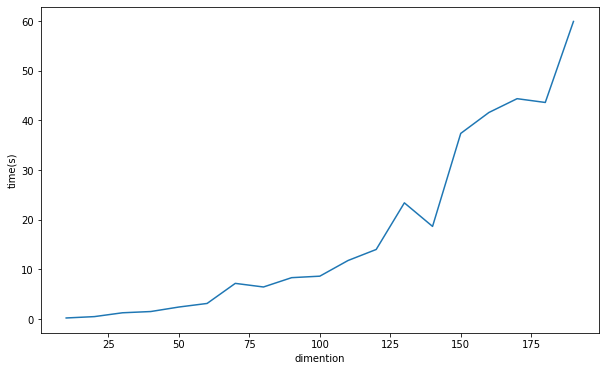

In [69]:
stats_cmadm.plot_time_vs_dim()

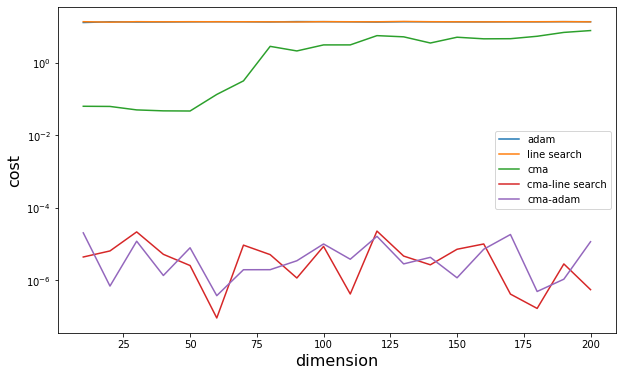

In [117]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(stats_adam['dims'], stats_adam['cost'], label="adam")
ax.plot(stats_ls['dims'], stats_ls["cost"], label="line search")
ax.plot(stats_cma['dims'], stats_cma['cost'], label="cma")
ax.plot(stats_cmals['dims'], stats_cmals['cost'], label="cma-line search")
ax.plot(stats_cmadam['dims'], stats_cmadam['cost'], label="cma-adam")
ax.set_xlabel("dimension", fontsize=16)
ax.set_ylabel("cost", fontsize=16)
plt.yscale('log')
plt.legend()

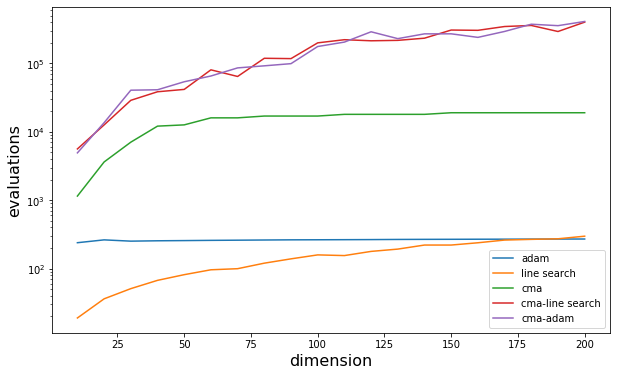

In [116]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(stats_adam['dims'], stats_adam['evals'], label="adam")
ax.plot(stats_ls['dims'], stats_ls["evals"], label="line search")
ax.plot(stats_cma['dims'], stats_cma['evals'], label="cma")
ax.plot(stats_cmals['dims'], stats_cmals['evals'], label="cma-line search")
ax.plot(stats_cmadam['dims'], stats_cmadam['evals'], label="cma-adam")
ax.set_xlabel("dimension", fontsize=16)
ax.set_ylabel("evaluations", fontsize=16)
plt.yscale('log')
plt.legend()

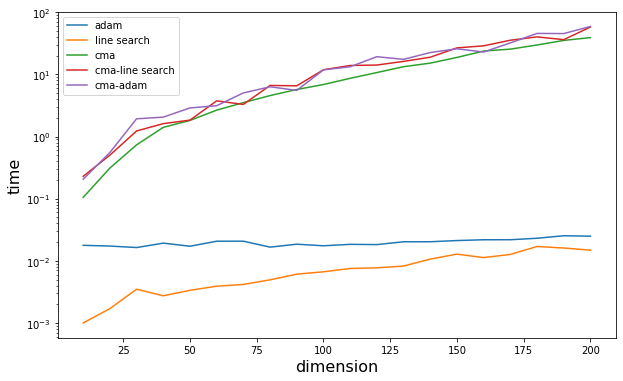

In [115]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(stats_adam['dims'], stats_adam['time'], label="adam")
ax.plot(stats_ls['dims'], stats_ls["time"], label="line search")
ax.plot(stats_cma['dims'], stats_cma['time'], label="cma")
ax.plot(stats_cmals['dims'], stats_cmals['time'], label="cma-line search")
ax.plot(stats_cmadam['dims'], stats_cmadam['time'], label="cma-adam")
ax.set_xlabel("dimension", fontsize=16)
ax.set_ylabel("time", fontsize=16)
plt.yscale('log')
plt.legend()

In [72]:
stats_adam

{'status': None,
 'gradient_before_after': array([], dtype=float64),
 'arg': array([], dtype=float64),
 'val': array([], dtype=float64),
 'evals': array([237.2, 247.3, 251.3, 254.3, 257.2, 259.2, 260.7, 261.9, 263.2,
        263.9, 265.5, 265.7, 266.7, 267.6, 268.5, 269. , 269.3, 270.6,
        270.9]),
 'time': array([0.01557949, 0.0163682 , 0.01668029, 0.01597569, 0.01781449,
        0.01756742, 0.0181963 , 0.0198756 , 0.0186336 , 0.0189527 ,
        0.01802061, 0.01828983, 0.02055011, 0.02064071, 0.02168419,
        0.02098141, 0.01999197, 0.02145431, 0.02124171]),
 'cost': array([13.82151054, 13.34264805, 13.70775604, 13.3717643 , 13.44953106,
        13.53019301, 13.61418572, 13.85600214, 13.69664801, 13.66005804,
        13.62869559, 13.5946261 , 13.53572088, 13.56247041, 13.77006438,
        13.62253496, 13.60720662, 13.772358  , 13.64073992]),
 'dims': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190])}